# Human Activity Recognition using Smartphone Data

### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

features = list()
with open('features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


### Obtaining Training Data

In [2]:
import os
if not os.path.exists('train.csv'):
    
    X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None, names=features)

    X_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

    y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
    y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                           4:'SITTING', 5:'STANDING',6:'LAYING'})

    train = X_train
    train['Activity'] = y_train
    train['Activity'] = y_train_labels
    train.sample()
    train.to_csv('train.csv',index=False,header=True)
    print('File has created.')
else:
    train = pd.read_csv('train.csv')
    print('Training Data Loaded!')

Training Data Loaded!


In [3]:
train.shape

(14704, 563)

In [4]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### Obtain Test Data

In [5]:
if not os.path.exists('test.csv'):
    X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None, names=features)

    X_test['subject'] = pd.read_csv('subject_test.txt', header=None, squeeze=True)
else:
    test = pd.read_csv('test.csv')
print('Test Data Loaded!')

Test Data Loaded!


In [6]:
test.shape

(5894, 563)

### Data Cleaning

##### Checking for Duplicates

In [7]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 7352
No of duplicates in test : 2947


##### Checking for NaN/ Null Values

In [8]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


##### Check for Data Imbalance

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

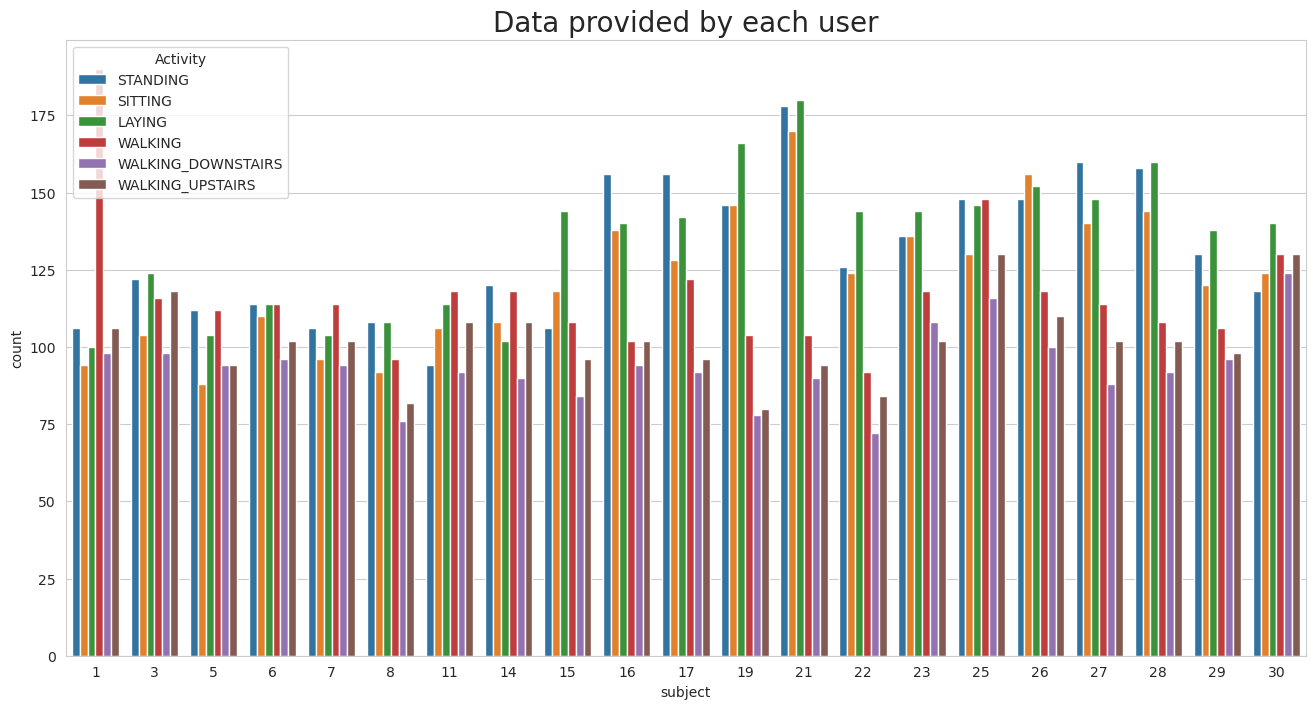

In [10]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sb.countplot(x='subject',hue='Activity', data = train)
plt.show()

##### Changing Feature Names

In [11]:
columns = train.columns

columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

### Exploratory Data Analysis

##### Categorizing Stationary and Moving Activities

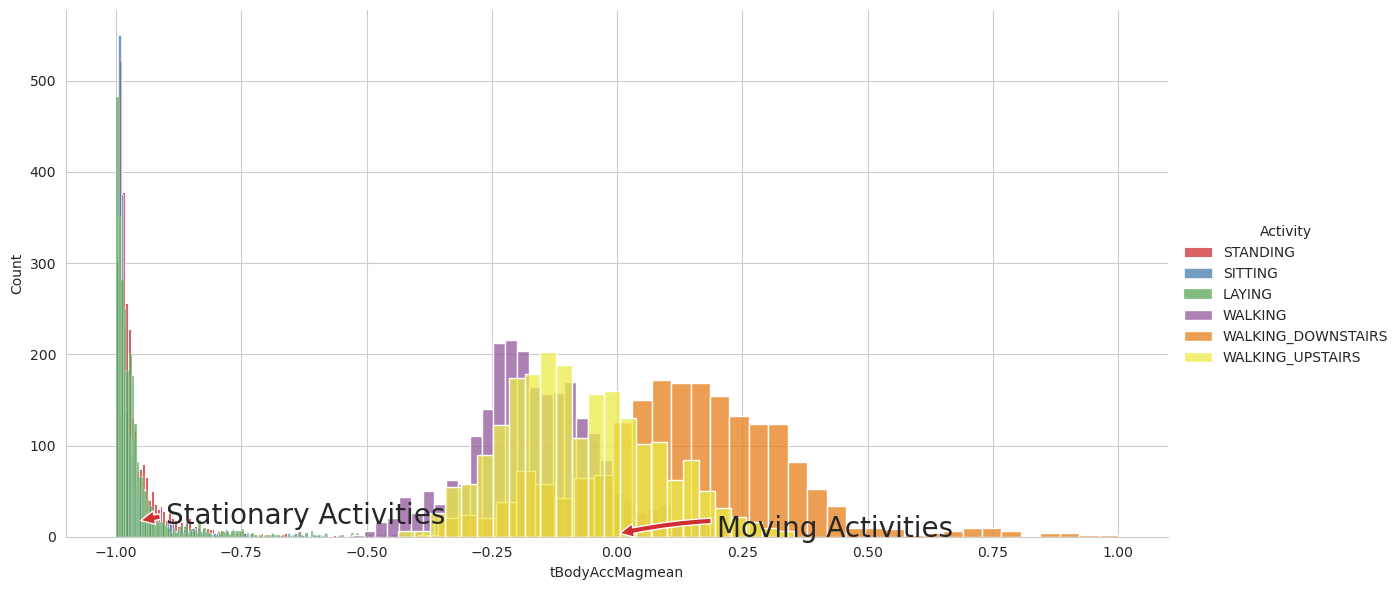

In [12]:
sb.set_palette("Set1", desat=0.80)
facetgrid = sb.FacetGrid(train, hue='Activity', height=6,aspect=2)
facetgrid.map(sb.histplot,'tBodyAccMagmean', kde=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20, va='center', ha='left', arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20, va='center', ha='left', arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

##### Seperating Acceleration Magnitude

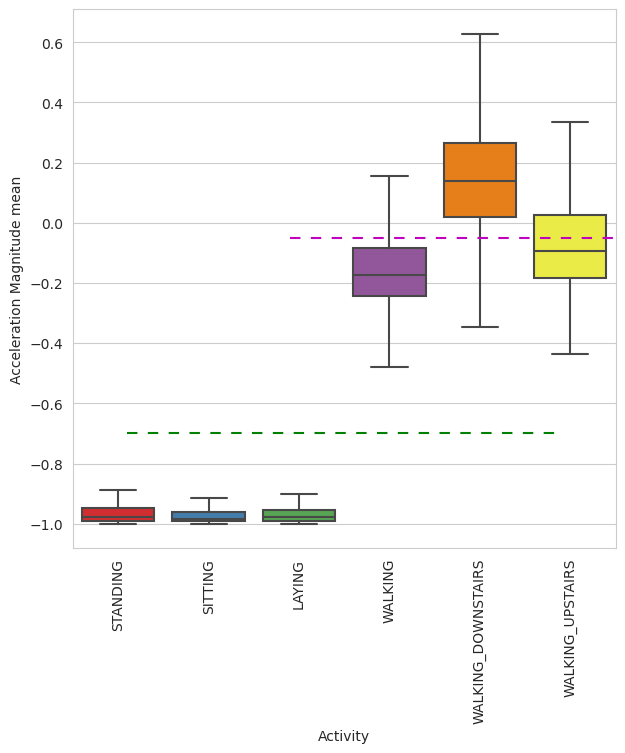

In [13]:
plt.figure(figsize=(7,7))
sb.boxplot(x='Activity', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

##### Position of GravityAccelerationComponents

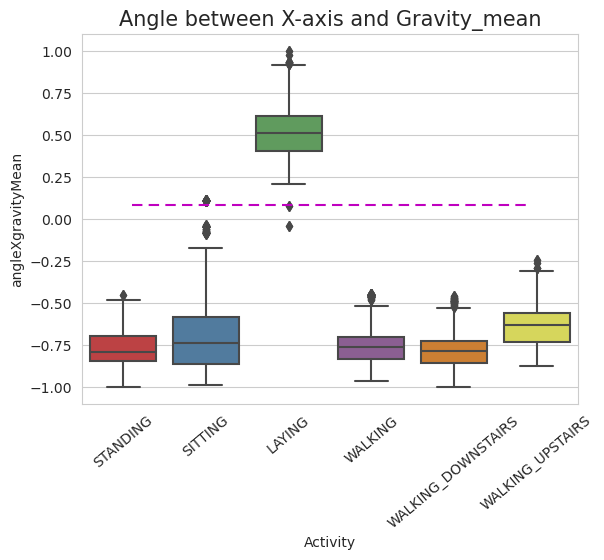

In [14]:
sb.boxplot(x='Activity', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

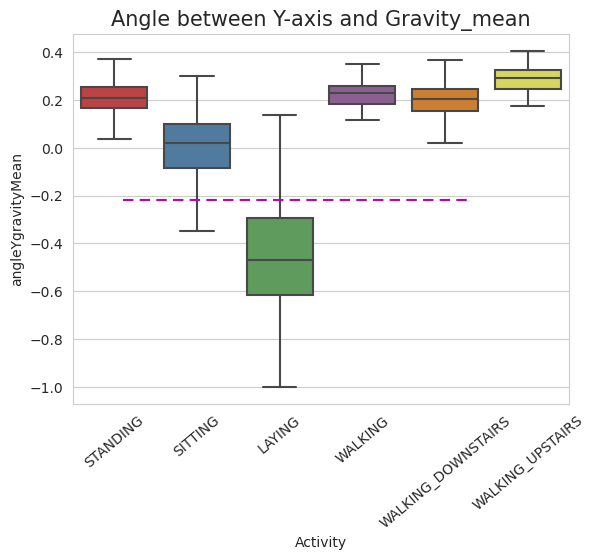

In [15]:
sb.boxplot(x='Activity', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

### Applying t-sne on the Data

In [16]:
from sklearn.manifold import TSNE

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):    
    for index,perplexity in enumerate(perplexities):
        print('Performing t-SNE with Perplexity - {} and with {} Iterations at Max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        print('Creating Plot for this t-SNE Visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        sb.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8, palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("Perplexity : {} and Max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('Saving this Plot as Image in Present Working Directory...')
        plt.savefig(img_name)
        plt.show()
        print('Plot Saved!')


Performing t-SNE with Perplexity - 2 and with 1000 Iterations at Max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 14704 samples in 0.007s...
[t-SNE] Computed neighbors for 14704 samples in 4.244s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probabilities for sam

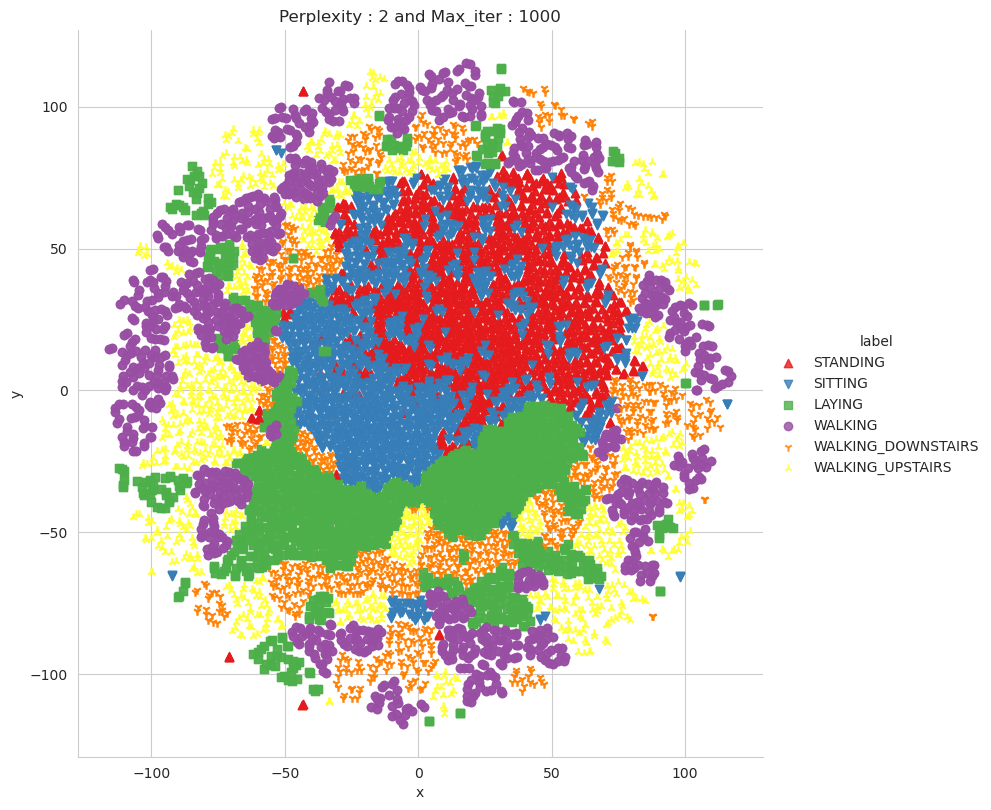

Plot Saved!
Performing t-SNE with Perplexity - 5 and with 1000 Iterations at Max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 14704 samples in 0.008s...
[t-SNE] Computed neighbors for 14704 samples in 3.782s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probabil

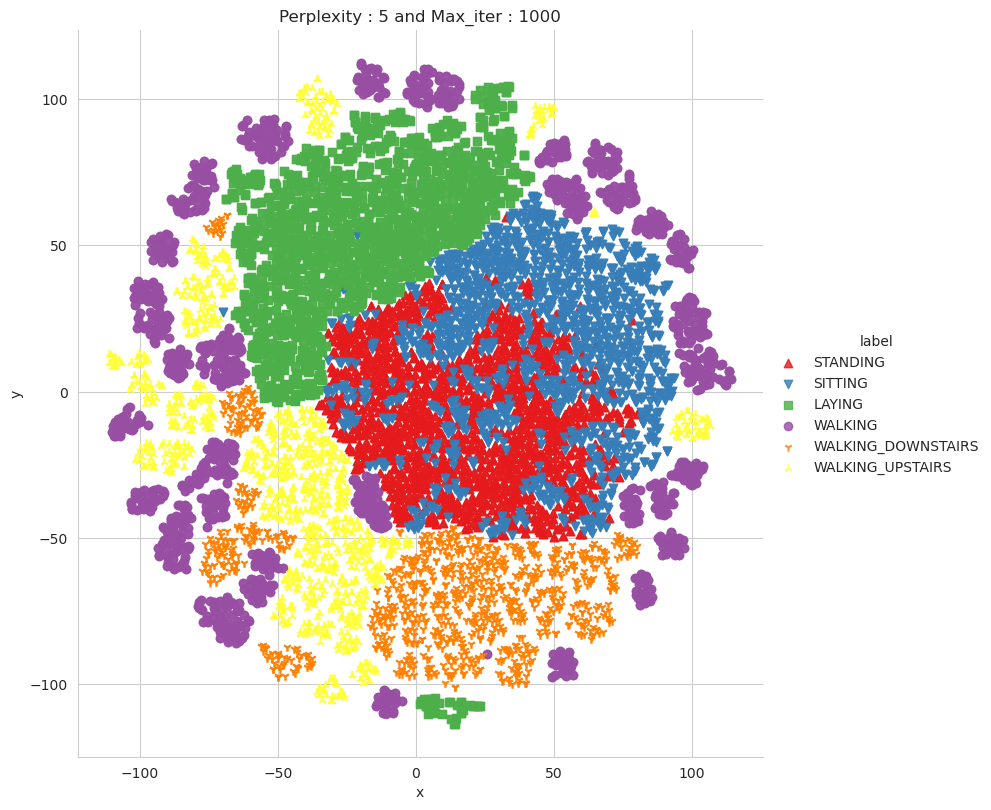

Plot Saved!
Performing t-SNE with Perplexity - 10 and with 1000 Iterations at Max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 14704 samples in 0.010s...
[t-SNE] Computed neighbors for 14704 samples in 3.737s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probabi

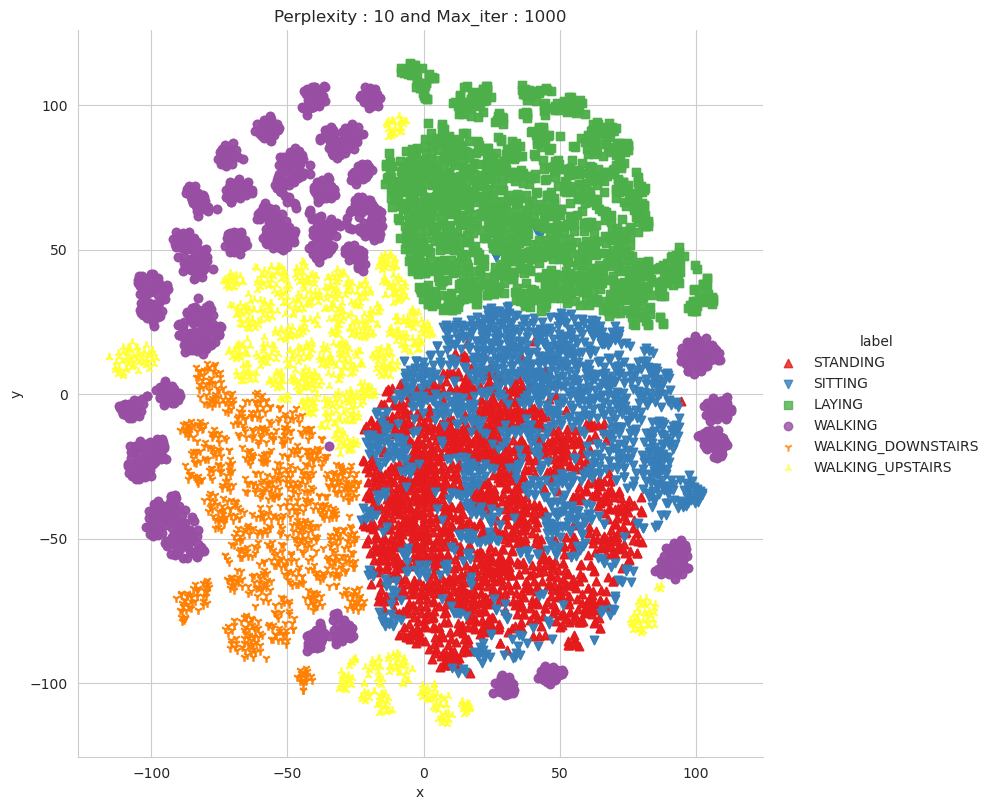

Plot Saved!
Performing t-SNE with Perplexity - 20 and with 1000 Iterations at Max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 14704 samples in 0.008s...
[t-SNE] Computed neighbors for 14704 samples in 3.921s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probabi

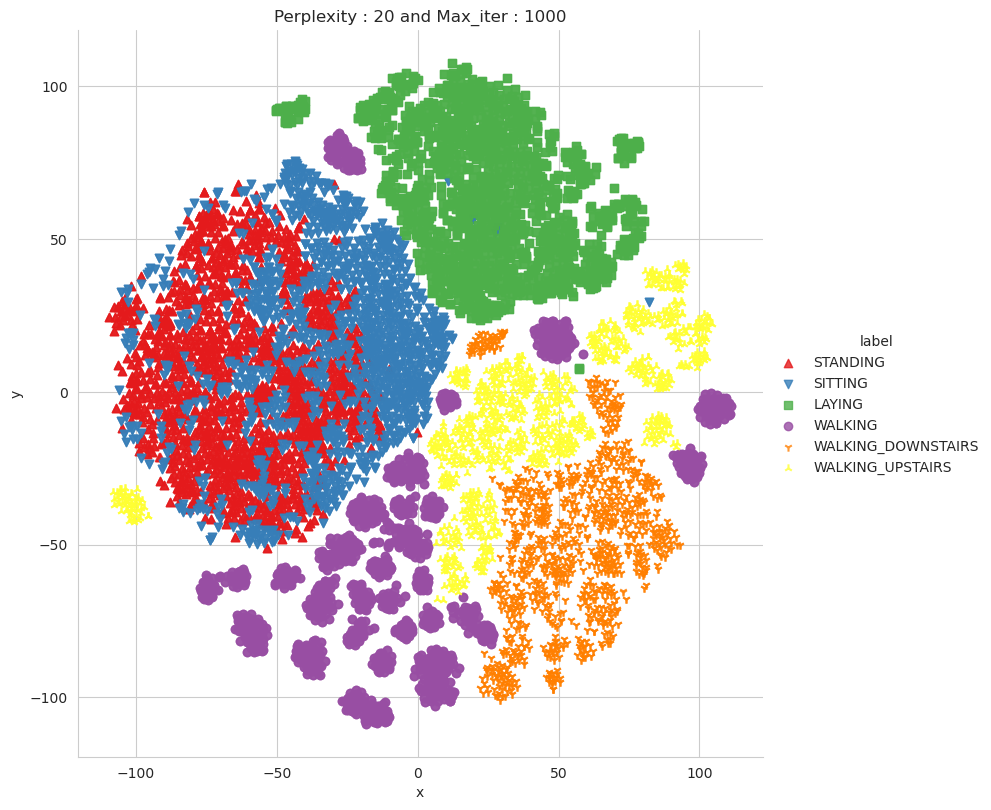

Plot Saved!
Performing t-SNE with Perplexity - 50 and with 1000 Iterations at Max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 14704 samples in 0.010s...
[t-SNE] Computed neighbors for 14704 samples in 4.255s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probab

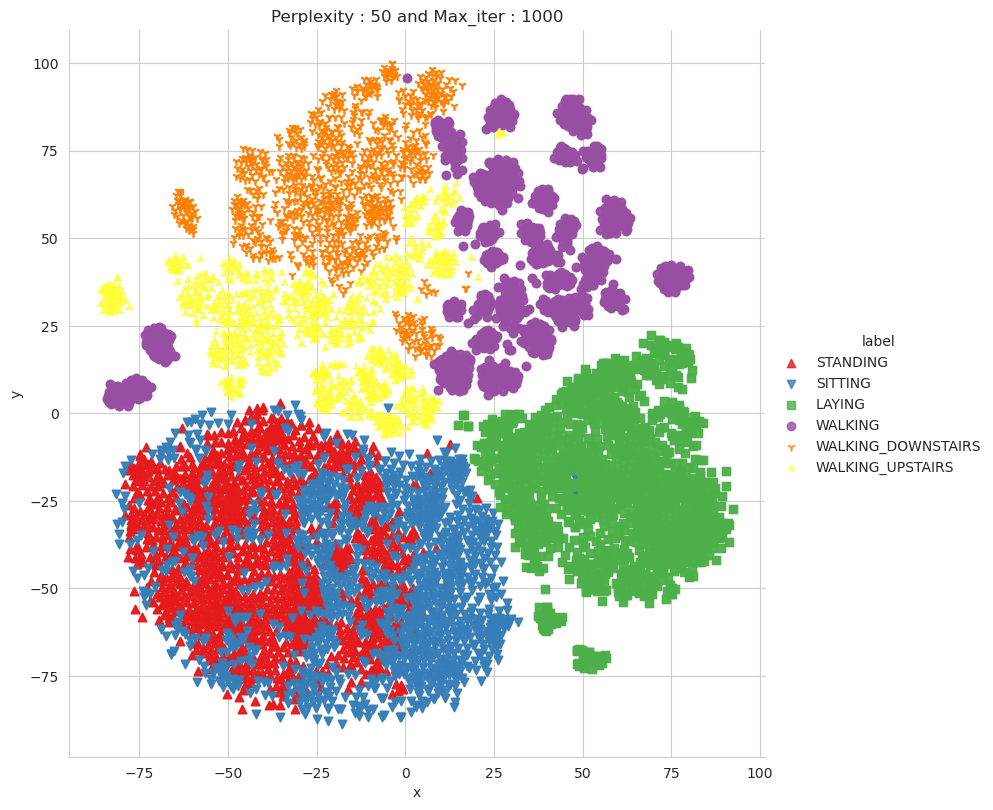

Plot Saved!


In [17]:
X_pre_tsne = train.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

### Obtaining Train Data and Test Data

In [18]:
X_train = train.drop(['subject', 'Activity', 'Activity'], axis=1)
y_train = train.Activity

In [19]:
X_test = test.drop(['subject', 'Activity', 'Activity'], axis=1)
y_test = test.Activity

In [20]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((14704, 561),(14704,))
X_test  and y_test  : ((5894, 561),(5894,))


### Data Modeling

### Labels for plotting confusion matrix

In [21]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function for Confusion Matrix

In [22]:
import itertools
from sklearn.metrics import confusion_matrix

plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic Function to run Specified Model

In [23]:
from datetime import datetime

def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    results = dict()
    
    train_start_time = datetime.now()
    print('Training the Model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('Training Time (HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    print('Predicting Test Data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('Testing Time (HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    results['classification_report'] = classification_report
    print(classification_report)
    
    results['model'] = model
    
    return results

### gridsearch Attributes Printing Method

In [24]:
def print_grid_search_attributes(model):
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))


##### Logistic Regression with GridSearch

Training the Model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done 
 

Training Time (HH:MM:SS.ms) - 0:00:13.831613


Predicting Test Data
Done 
 

Testing Time (HH:MM:SS:ms) - 0:00:00.011605


---------------------
|      Accuracy      |
---------------------

    0.9555480149304377


--------------------
| Confusion Matrix |
--------------------

 [[1074    0    0    0    0    0]
 [   0  854  126    0    0    2]
 [   0   28 1036    0    0    0]
 [   0    0    0  984    4    4]
 [   0    0    0   18  800   22]
 [   0    0    0   54    4  884]]


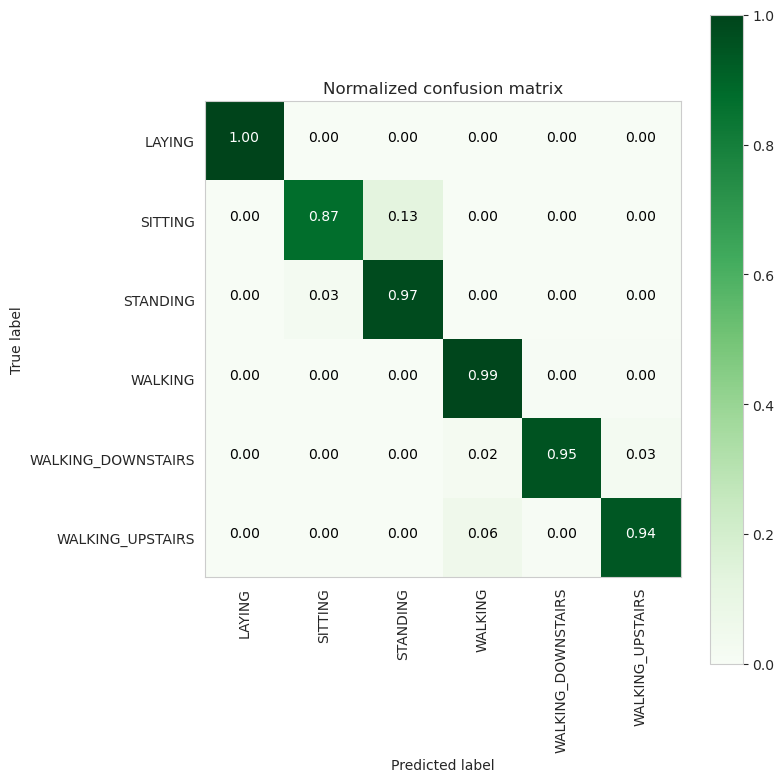

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1074
           SITTING       0.97      0.87      0.92       982
          STANDING       0.89      0.97      0.93      1064
           WALKING       0.93      0.99      0.96       992
WALKING_DOWNSTAIRS       0.99      0.95      0.97       840
  WALKING_UPSTAIRS       0.97      0.94      0.95       942

          accuracy                           0.96      5894
         macro avg       0.96      0.95      0.96      5894
      weighted avg       0.96      0.96      0.96      5894



In [25]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [26]:
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=10)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 10, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9905468269006348



##### Linear SVC with GridSearch

Training the Model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done 
 

Training Time (HH:MM:SS.ms) - 0:00:37.752979


Predicting Test Data
Done 
 

Testing Time (HH:MM:SS:ms) - 0:00:00.009639


---------------------
|      Accuracy      |
---------------------

    0.9670851713607058


--------------------
| Confusion Matrix |
--------------------

 [[1074    0    0    0    0    0]
 [   4  860  112    0    0    6]
 [   0   22 1040    2    0    0]
 [   0    0    0  992    0    0]
 [   0    0    0    4  826   10]
 [   0    0    0   34    0  908]]


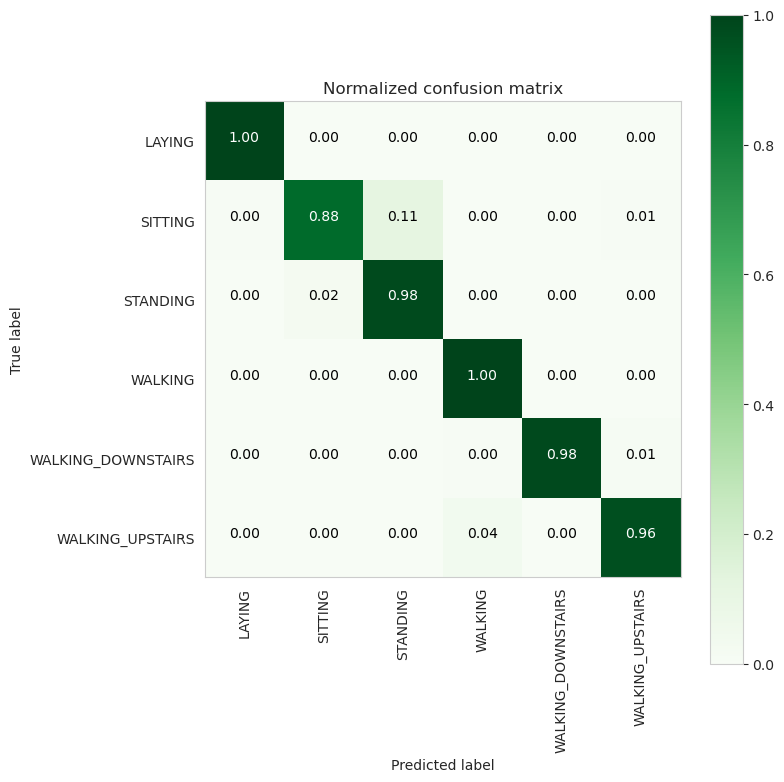

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1074
           SITTING       0.98      0.88      0.92       982
          STANDING       0.90      0.98      0.94      1064
           WALKING       0.96      1.00      0.98       992
WALKING_DOWNSTAIRS       1.00      0.98      0.99       840
  WALKING_UPSTAIRS       0.98      0.96      0.97       942

          accuracy                           0.97      5894
         macro avg       0.97      0.97      0.97      5894
      weighted avg       0.97      0.97      0.97      5894



In [27]:
from sklearn.svm import LinearSVC

parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [28]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.992655212373967



##### Kernel SVM with GridSearch

Training the Model..
Done 
 

Training Time (HH:MM:SS.ms) - 0:07:14.083918


Predicting Test Data
Done 
 

Testing Time (HH:MM:SS:ms) - 0:00:11.477939


---------------------
|      Accuracy      |
---------------------

    0.9423142178486597


--------------------
| Confusion Matrix |
--------------------

 [[1050    0    0    0   24    0]
 [   0  894   62    0   26    0]
 [   0   22 1020    0   22    0]
 [   0    0    0  912   80    0]
 [   0    0    0   12  776   52]
 [   0    0    0    8   32  902]]


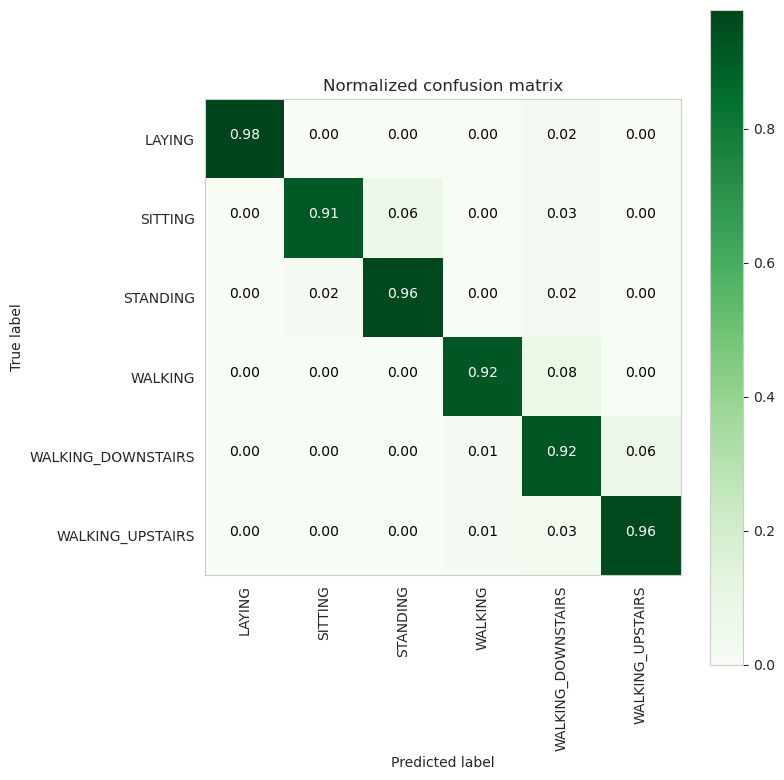

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      0.98      0.99      1074
           SITTING       0.98      0.91      0.94       982
          STANDING       0.94      0.96      0.95      1064
           WALKING       0.98      0.92      0.95       992
WALKING_DOWNSTAIRS       0.81      0.92      0.86       840
  WALKING_UPSTAIRS       0.95      0.96      0.95       942

          accuracy                           0.94      5894
         macro avg       0.94      0.94      0.94      5894
      weighted avg       0.95      0.94      0.94      5894



In [29]:
from sklearn.svm import SVC

parameters = {'C':[2,8,16], 'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [30]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=2, gamma=0.125)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 2, 'gamma': 0.125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	1.0



##### Decision Trees with GridSearch

Training the Model..
Done 
 

Training Time (HH:MM:SS.ms) - 0:00:11.770715


Predicting Test Data
Done 
 

Testing Time (HH:MM:SS:ms) - 0:00:00.009715


---------------------
|      Accuracy      |
---------------------

    0.8737699355276553


--------------------
| Confusion Matrix |
--------------------

 [[1074    0    0    0    0    0]
 [   0  744  238    0    0    0]
 [   0  118  946    0    0    0]
 [   0    0    0  946   34   12]
 [   0    0    0   46  704   90]
 [   0    0    0  132   74  736]]


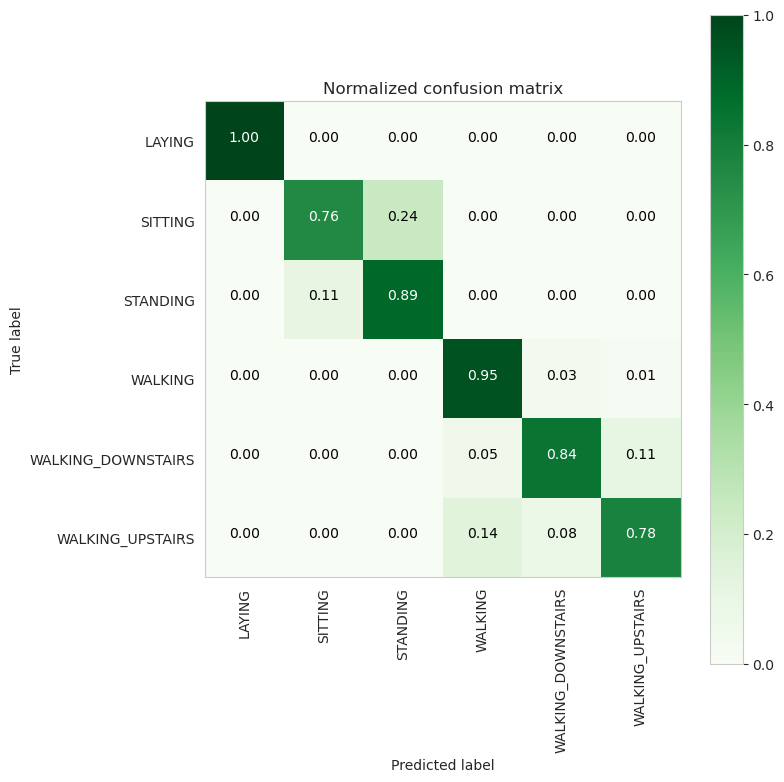

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1074
           SITTING       0.86      0.76      0.81       982
          STANDING       0.80      0.89      0.84      1064
           WALKING       0.84      0.95      0.89       992
WALKING_DOWNSTAIRS       0.87      0.84      0.85       840
  WALKING_UPSTAIRS       0.88      0.78      0.83       942

          accuracy                           0.87      5894
         macro avg       0.87      0.87      0.87      5894
      weighted avg       0.88      0.87      0.87      5894



In [31]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [32]:
print_grid_search_attributes(dt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=9)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9756526194292746



### Results

In [33]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "Hyperparameter Tuing", "Accuracy"]
table.add_row(["Linear Model", "GridSearchCV", 95.86])
table.add_row(["Linear SVC", "GridSearchCV", 96.67])
table.add_row(["SVC", "GridSearchCV", 96.26])
table.add_row(["Decision Tree", "GridSearchCV", 87.71])

print(table.get_string(title="ML Model Results"))

+-------------------------------------------------+
|                 ML Model Results                |
+---------------+----------------------+----------+
|     Model     | Hyperparameter Tuing | Accuracy |
+---------------+----------------------+----------+
|  Linear Model |     GridSearchCV     |  95.86   |
|   Linear SVC  |     GridSearchCV     |  96.67   |
|      SVC      |     GridSearchCV     |  96.26   |
| Decision Tree |     GridSearchCV     |  87.71   |
+---------------+----------------------+----------+
